In [5]:
import os
import pandas as pd
from exp_tools import *
import numpy as np

In [8]:
# 遞迴尋找所有 csv
def find_all_csv_files(root_dir):
    map_csv_files = {}
    for dirpath, _, filenames in os.walk(root_dir):
        for f in filenames:
            if f.endswith('.csv'):
                map_csv_files[os.path.splitext(f)[0]] = os.path.join(dirpath, f)
    return map_csv_files

root_dir = 'instance/auto-encoder'
instance_files = find_all_csv_files(root_dir)
print(instance_files)
print(len(instance_files))

{'PMDI_imputed_auto-encoder': 'instance/auto-encoder/PMDI_imputed_auto-encoder.csv'}
1


===== 處理 PMDI_imputed_auto-encoder =====


Tuning Models: 100%|██████████| 6/6 [00:10<00:00,  1.82s/it]


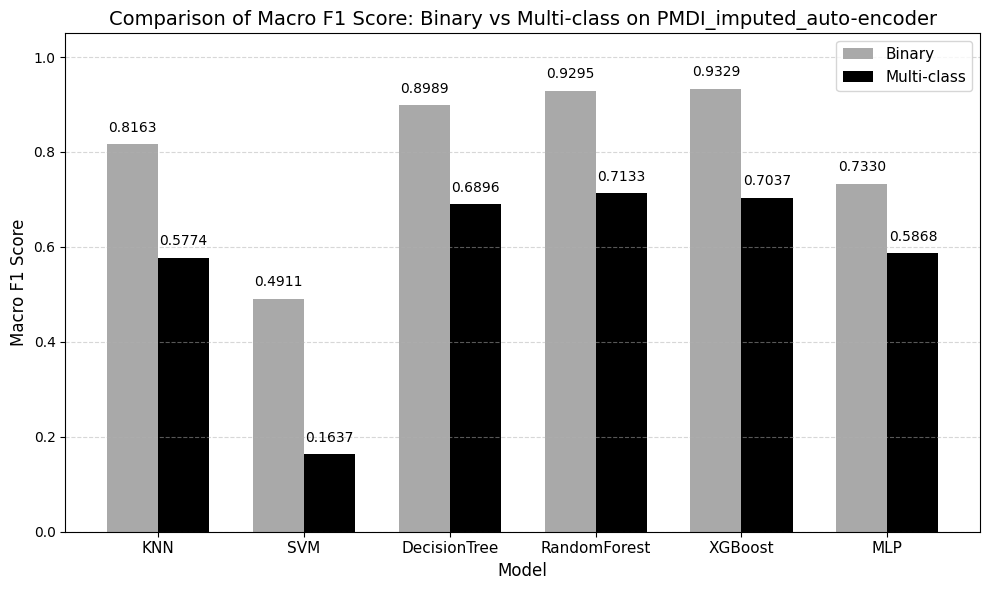

In [9]:
all_results_bin = {}
all_results_multi = {}
np.seterr(all='ignore')

for fname in instance_files:
    print(f'===== 處理 {fname} =====')
    df = load_instance(instance_files[fname])
    df_processed = preprocess(df)
    (X_train_bin, X_test_bin, y_train_bin, y_test_bin,
     X_train_multi, X_test_multi, y_train_multi, y_test_multi) = split_train_test(df_processed)
    with suppress_warnings():
        # Binary
        results_bin = evaluate(X_train_bin, X_test_bin, y_train_bin, y_test_bin, task='binary')
        # Multi-class
        results_multi = evaluate(X_train_multi, X_test_multi, y_train_multi, y_test_multi, task='multiclass')
    all_results_bin[fname] = results_bin['F1']
    all_results_multi[fname] = results_multi['F1']
    # 可選：每個 instance 畫一次 F1 比較圖
    plot_f1_comparison(results_bin, results_multi, fname)

In [10]:
# 彙總所有 instance 的 F1 分數
summary_bin = pd.DataFrame(all_results_bin)
summary_multi = pd.DataFrame(all_results_multi)

print('===== 各 instance 的 Binary F1 分數 =====')
display(summary_bin)
print('===== 各 instance 的 Multi-class F1 分數 =====')
display(summary_multi)

===== 各 instance 的 Binary F1 分數 =====


,PMDI_imputed_auto-encoder
KNN,0.816285
SVM,0.491094
DecisionTree,0.898919
RandomForest,0.929491
XGBoost,0.932918
MLP,0.732989


===== 各 instance 的 Multi-class F1 分數 =====


,PMDI_imputed_auto-encoder
KNN,0.577364
SVM,0.163698
DecisionTree,0.689557
RandomForest,0.713286
XGBoost,0.703724
MLP,0.586788


Exception ignored in: <function ResourceTracker.__del__ at 0x104ee5f80>
Traceback (most recent call last):
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1070cdf80>
Traceback (most recent call last):
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/Users/josephlee/.pyenv/versions/3.13.3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
Chi